In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Basic Fourier Transformation

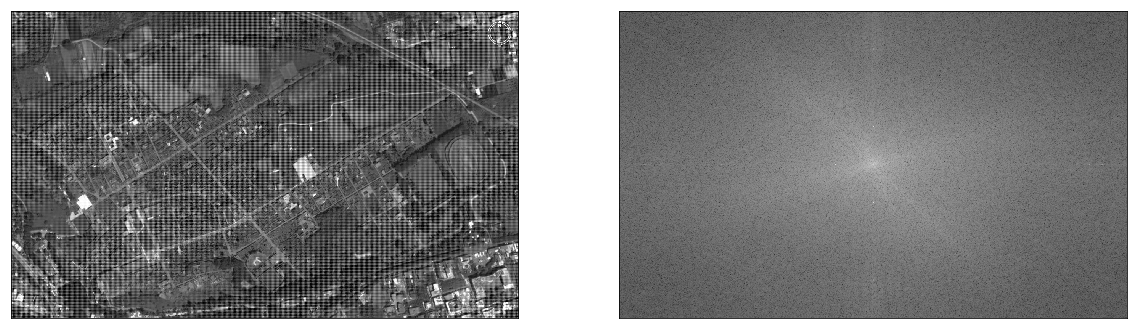

In [2]:
# Leer imagen
img = cv2.imread('aerialpompeiiperiodic.jpg', 0) # Argumento 0 es para leerlo en escala de grises (1 canal)

# fft -> fast fourier transformation // fftshift -> para ordenar los cuadrantes
f = np.fft.fft2(img)
f = np.fft.fftshift(f)

# Los valores de la fft están por encima de los 255 maximo de las escalas de grises
magnitud = np.log(1 + np.abs(f))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitud, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Inverse Fourier Transform

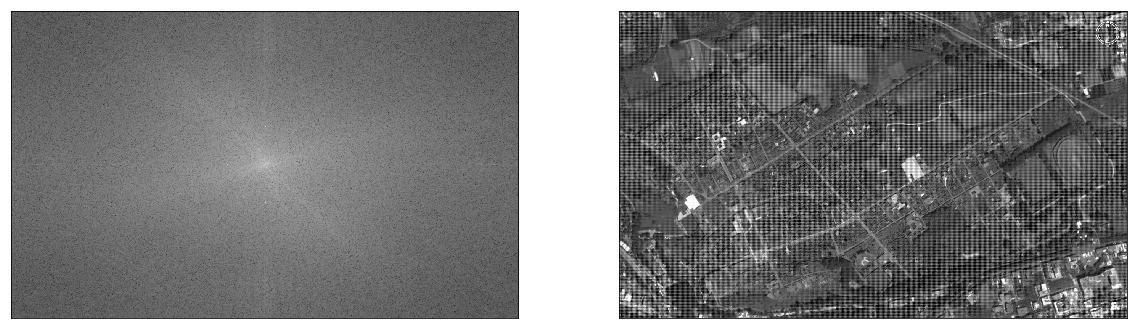

In [8]:
img_back = np.fft.ifftshift(f)
img_back = np.fft.ifft2(img_back)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(magnitud, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

### Modifying Spectrum

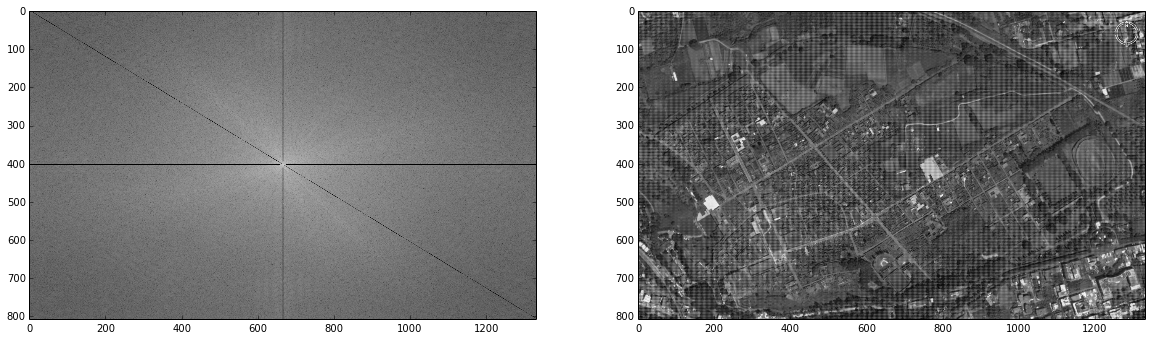

In [48]:
rows, cols = img.shape
# rows, cols, _ = img.shape # Para imagenes a colores
crow, ccol = rows // 2, cols // 2

# Basic mask -> rows x cols matrix filled with 1
mask = np.ones((rows, cols), np.uint8)
# Basic mask -> rows x cols matrix filled with 0
mask = np.zeros((rows, cols), np.uint8)

n = 1
n2 = 8
mask[0 : rows, ccol-n : ccol+n] = 0

mask[crow-n:crow+n, 0:cols] = 0


for i in range(0, rows):
    for j in range(0, cols):
        #if -i + rows - 1 == (-(rows - 1) / (cols - 1)) * (j - cols + 1):
        if -i == int(-rows / cols  * j):
            mask[i][j] = 0
            
# Correccion

mask[crow - n2:crow + n2, ccol-n:ccol+n] = 1
mask[crow-n:crow+n, ccol-n2:ccol+n2] = 1

#print(mask)

f_filter = f * mask

img_back = np.fft.ifftshift(f_filter)
img_back = np.fft.ifft2(img_back)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(np.log(1 + np.abs(f_filter)), cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.show()

(808, 1)
(808, 808)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


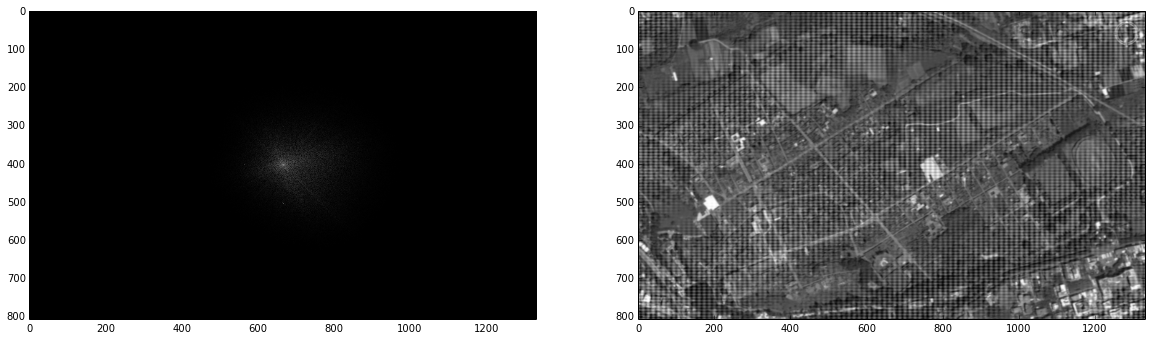

In [68]:
row, col = img.shape

x = cv2.getGaussianKernel(row, 100)
print(x.shape)
gaussian = x * x.T
mask = np.zeros((rows, cols))
for i in range(0, gaussian.shape[0]):
    for j in range(0, gaussian.shape[1]):
        mask[i][j + int(col / 4)] = gaussian[i][j]
print(gaussian.shape)
print(mask)
#f_filter = f * gaussian
f_filter = f * mask

img_back = np.fft.ifftshift(f_filter)
img_back = np.fft.ifft2(img_back)
img_back = np.abs(img_back)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1), plt.imshow(np.log(1 + np.abs(f_filter)), cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(img_back, cmap='gray')
plt.show()